In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.listdir()

['train_u6lujuX_CVtuZ9i.csv',
 'test_Y3wMUE5_7gLdaTN.csv',
 'Analytics Vidhya Loan Prediction.ipynb',
 'Sample_Submission_ZAuTl8O_FK3zQHh.csv',
 '.ipynb_checkpoints']

In [3]:
train_df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [4]:
train_df.shape

(614, 13)

In [5]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test_df = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [7]:
test_df.shape

(367, 12)

In [8]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
sample_submission = pd.read_csv('Sample_Submission_ZAuTl8O_FK3zQHh.csv')

In [10]:
sample_submission

,Loan_ID,Loan_Status


In [11]:
train_df['data_type'] = 'train'
test_df['data_type'] = 'test'

In [12]:
overall_df = train_df.append(test_df)

In [13]:
overall_df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Dependents',
       'Education', 'Gender', 'LoanAmount', 'Loan_Amount_Term', 'Loan_ID',
       'Loan_Status', 'Married', 'Property_Area', 'Self_Employed',
       'data_type'],
      dtype='object')

In [14]:
overall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 14 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
data_type            981 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 115.0+ KB


In [15]:
train_df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [16]:
train_df.Loan_Status.isnull().sum()

0

In [17]:
overall_df['is_approved'] = overall_df.Loan_Status.map({'Y':1, 'N':0})

In [18]:
overall_df.Self_Employed.value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [19]:
overall_df.Self_Employed.isnull().sum()

55

In [20]:
overall_df['Self_Employed2'] = overall_df.Self_Employed.fillna('NA')

In [21]:
overall_df.groupby('Self_Employed2').agg({'is_approved':['count','mean']})

is_approved          
                     count      mean
Self_Employed2                      
NA                      32  0.718750
No                     500  0.686000
Yes                     82  0.682927

In [22]:
overall_df.Married.value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [23]:
overall_df.Married.isnull().sum()

3

In [24]:
overall_df['Married2'] = overall_df.Married.fillna('NA')

In [25]:
overall_df.groupby('Married2').agg({'is_approved':['count','mean']})

is_approved          
               count      mean
Married2                      
NA                 3  1.000000
No               213  0.629108
Yes              398  0.716080

In [26]:
overall_df.Gender.value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [27]:
overall_df.Gender.isnull().sum()

24

In [28]:
overall_df['Gender2'] = overall_df.Gender.fillna('NA')

In [29]:
overall_df.groupby('Gender2').agg({'is_approved':['count','mean']})

is_approved          
              count      mean
Gender2                      
Female          112  0.669643
Male            489  0.693252
NA               13  0.615385

In [30]:
overall_df.Education.value_counts()

Graduate        763
Not Graduate    218
Name: Education, dtype: int64

In [31]:
overall_df.Education.isnull().sum()

0

In [32]:
overall_df.groupby('Education').agg({'is_approved':['count','mean']})

is_approved          
                   count      mean
Education                         
Graduate             480  0.708333
Not Graduate         134  0.611940

In [33]:
overall_df.Credit_History.value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [34]:
overall_df.Credit_History.isnull().sum()

79

In [35]:
overall_df['Credit_History2'] = overall_df.Credit_History.fillna(-1)

In [36]:
overall_df.groupby('Credit_History2').agg({'is_approved':['count','mean']})

is_approved          
                      count      mean
Credit_History2                      
-1.0                     50  0.740000
 0.0                     89  0.078652
 1.0                    475  0.795789

In [37]:
overall_df.Dependents.value_counts() 

0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

In [38]:
overall_df.Dependents.isnull().sum()

25

In [39]:
overall_df['Dependents2'] = overall_df.Dependents.fillna('NA')

In [40]:
overall_df.groupby('Dependents2').agg({'is_approved':['count','mean']})

is_approved          
                  count      mean
Dependents2                      
0                   345  0.689855
1                   102  0.647059
2                   101  0.752475
3+                   51  0.647059
NA                   15  0.600000

In [41]:
overall_df.Property_Area.value_counts() 

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [42]:
overall_df.Property_Area.isnull().sum()

0

In [43]:
overall_df.groupby('Property_Area').agg({'is_approved':['count','mean']})

is_approved          
                    count      mean
Property_Area                      
Rural                 179  0.614525
Semiurban             233  0.768240
Urban                 202  0.658416

In [44]:
overall_df.ApplicantIncome.describe()

count      981.000000
mean      5179.795107
std       5695.104533
min          0.000000
25%       2875.000000
50%       3800.000000
75%       5516.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [45]:
overall_df.ApplicantIncome.isnull().sum()

0

In [46]:
overall_df['ApplicantIncomeBucket'] = pd.qcut(overall_df.ApplicantIncome, q = 4).astype(str)
overall_df['ApplicantIncomeBucket'].fillna('NA', inplace = True)

In [47]:
overall_df.groupby('ApplicantIncomeBucket').agg({'is_approved':['count','mean']})

is_approved          
                            count      mean
ApplicantIncomeBucket                      
(-0.001, 2875.0]              153  0.686275
(2875.0, 3800.0]              153  0.686275
(3800.0, 5516.0]              141  0.687943
(5516.0, 81000.0]             167  0.688623

In [48]:
overall_df.CoapplicantIncome.describe()

count      981.000000
mean      1601.916330
std       2718.772806
min          0.000000
25%          0.000000
50%       1110.000000
75%       2365.000000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [49]:
overall_df.CoapplicantIncome.isnull().sum()

0

In [50]:
overall_df['CoapplicantIncomeBucket'] = '0'

In [51]:
overall_df['CoapplicantIncomeBucket'][overall_df.CoapplicantIncome > 0] = pd.qcut(
    overall_df.CoapplicantIncome[overall_df.CoapplicantIncome > 0], q = 3).astype(str)
overall_df['CoapplicantIncomeBucket'].fillna('NA', inplace = True)

/Users/kaustubh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
overall_df.groupby('CoapplicantIncomeBucket').agg({'is_approved':['count','mean']})

is_approved          
                              count      mean
CoapplicantIncomeBucket                      
(16.119, 1778.333]              109  0.770642
(1778.333, 2791.333]            120  0.725000
(2791.333, 41667.0]             112  0.660714
0                               273  0.648352

In [53]:
overall_df.Loan_Amount_Term.value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [54]:
overall_df.Loan_Amount_Term.isnull().sum()

20

In [55]:
overall_df['Loan_Amount_Term2'] = overall_df.Loan_Amount_Term.fillna(-1)

In [56]:
overall_df.groupby('Loan_Amount_Term2').agg({'is_approved':['count','mean']})

is_approved          
                        count      mean
Loan_Amount_Term2                      
-1.0                       14  0.571429
 6.0                        0       NaN
 12.0                       1  1.000000
 36.0                       2  0.000000
 60.0                       2  1.000000
 84.0                       4  0.750000
 120.0                      3  1.000000
 180.0                     44  0.659091
 240.0                      4  0.750000
 300.0                     13  0.615385
 350.0                      0       NaN
 360.0                    512  0.701172
 480.0                     15  0.400000

In [57]:
overall_df.LoanAmount.describe()

count    954.000000
mean     142.511530
std       77.421743
min        9.000000
25%      100.000000
50%      126.000000
75%      162.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [58]:
overall_df['LoanAmountBucket'] = pd.qcut(overall_df.LoanAmount, q = 4).astype(str)
overall_df['LoanAmountBucket'].fillna('NA', inplace = True)

In [59]:
overall_df.groupby('LoanAmountBucket').agg({'is_approved':['count','mean']})

is_approved          
                       count      mean
LoanAmountBucket                      
(100.0, 126.0]           138  0.724638
(126.0, 162.0]           145  0.724138
(162.0, 700.0]           155  0.638710
(8.999, 100.0]           154  0.694805
nan                       22  0.500000

In [60]:
overall_df['amountByIncome'] = overall_df.LoanAmount/overall_df.ApplicantIncome

In [61]:
overall_df['amountByIncome'][overall_df.amountByIncome == np.Inf] = np.NAN

/Users/kaustubh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
overall_df.amountByIncome.describe()

count    952.000000
mean       0.037275
std        0.045932
min        0.002500
25%        0.023808
50%        0.030932
75%        0.042928
max        0.900000
Name: amountByIncome, dtype: float64

In [63]:
overall_df['amountByIncomeBucket'] = pd.qcut(overall_df.amountByIncome, q = 4).astype(str)
overall_df['amountByIncomeBucket'].fillna('NA', inplace = True)

In [64]:
overall_df.groupby('amountByIncomeBucket').agg({'is_approved':['count','mean']})

is_approved          
                           count      mean
amountByIncomeBucket                      
(0.0015, 0.0238]             154  0.655844
(0.0238, 0.0309]             143  0.706294
(0.0309, 0.0429]             153  0.751634
(0.0429, 0.9]                142  0.661972
nan                           22  0.500000

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [66]:
train_df_new = overall_df[overall_df.data_type == 'train']

In [67]:
dtc = DecisionTreeClassifier(min_samples_split = 30, min_samples_leaf = 15,presort= True)

In [68]:
train_df_new.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Dependents',
       'Education', 'Gender', 'LoanAmount', 'Loan_Amount_Term', 'Loan_ID',
       'Loan_Status', 'Married', 'Property_Area', 'Self_Employed', 'data_type',
       'is_approved', 'Self_Employed2', 'Married2', 'Gender2',
       'Credit_History2', 'Dependents2', 'ApplicantIncomeBucket',
       'CoapplicantIncomeBucket', 'Loan_Amount_Term2', 'LoanAmountBucket',
       'amountByIncome', 'amountByIncomeBucket'],
      dtype='object')

In [69]:
columns_to_use = [ 
       'Education', 'Property_Area', 
    'Self_Employed2', 'Married2', 'Gender2',
       'Credit_History2', 'Dependents2', 'ApplicantIncomeBucket',
       'CoapplicantIncomeBucket', 'Loan_Amount_Term2', 'LoanAmountBucket',
       'amountByIncome', 'amountByIncomeBucket']

In [70]:
X = train_df_new[columns_to_use]
Y = train_df_new.is_approved

In [71]:
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [72]:
# Encoding the variable
fitX = X.apply(lambda x: d[x.name].fit_transform(x))

In [73]:
fitdtc = dtc.fit(fitX, Y)

In [74]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

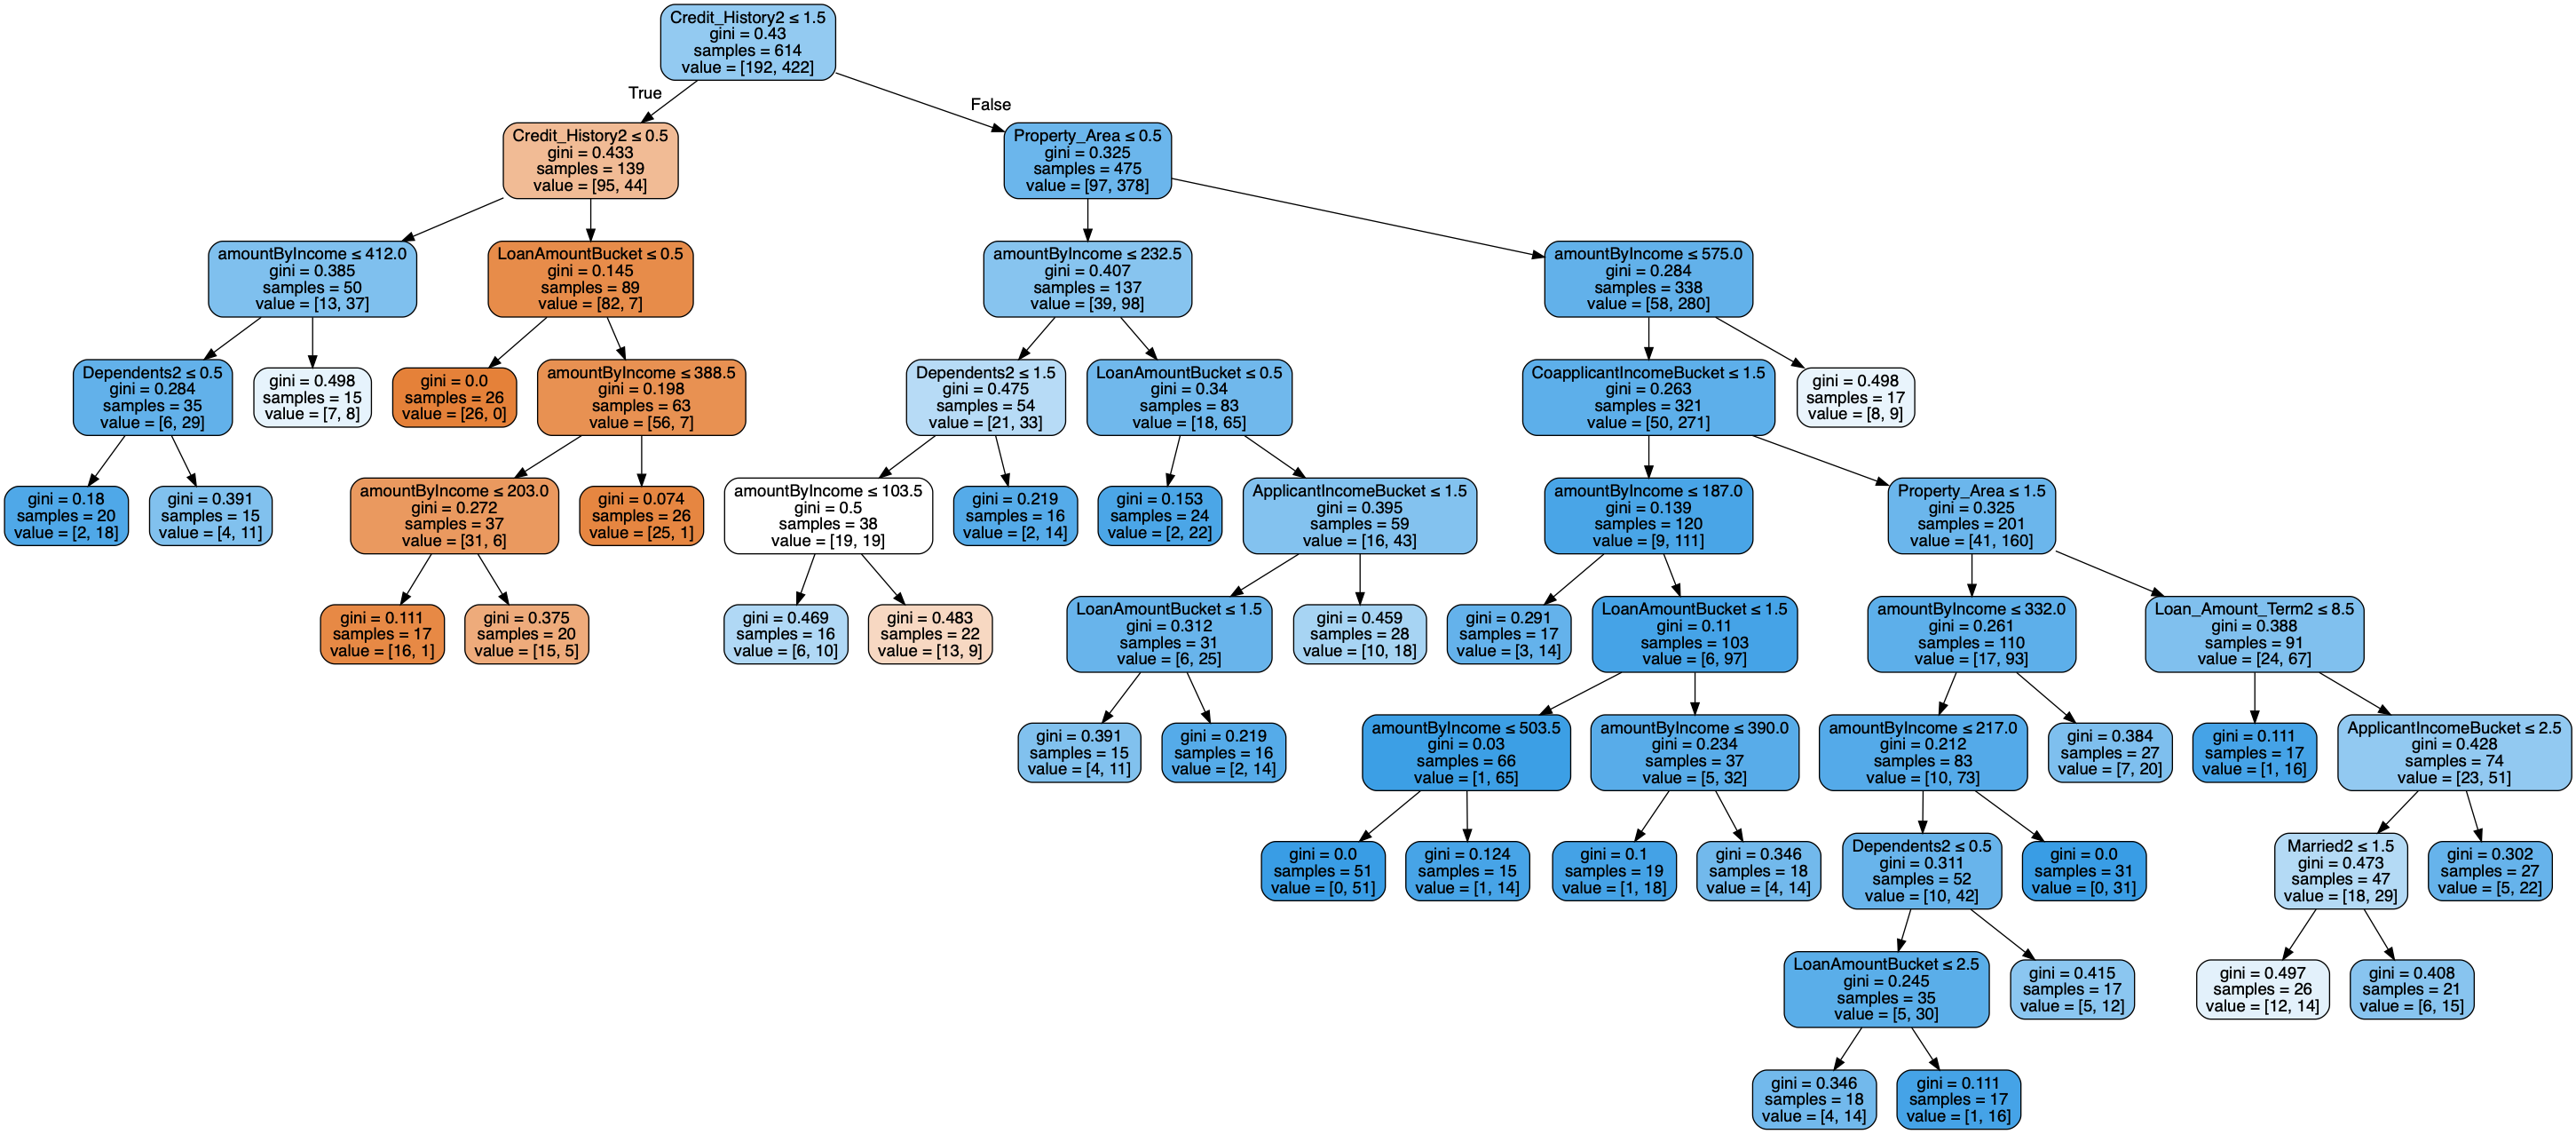

In [82]:
dot_data = StringIO()
export_graphviz(fitdtc, out_file=dot_data,
                feature_names = fitX.columns,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [79]:
export_graphviz?

In [91]:
list(zip(d['Credit_History2'].classes_, d['Credit_History2'].transform(d['Credit_History2'].classes_)))

[(-1.0, 0), (0.0, 1), (1.0, 2)]

### Variables giving distinct splits
- Credit History
- Education
- Married
- Property area
- Gender
- Coapplicant income